<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.01-Two-Transient-Model-Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Two transient model examples

In [10]:
from sympy import symbols, init_printing, Heaviside, laplace_transform, inverse_laplace_transform
import matplotlib.pyplot as plt
import numpy
init_printing()
%matplotlib inline

## A transient-response example

In this example, we have a stirred-tank with a volume $V_1$ of 4 $m^3$ being operated with an inlet flow rate $Q$ of 0.02 $m^3 s^{-1}$ and that contains an inert species at a concentration $C_{in}$ of 1 $gmol$ $m^{-3}$.

The model equation is a continuous-flow stirred-tank without any chemical reaction:

$$ V_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = Q[C_{in}(t) - C_1(t)] $$

In terms of the time constant $\tau_1$, it is written as

$$ \tau_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = C_{in}(t) - C_1(t) $$

where $ \tau_1 = \frac{V_1}{Q} $. Considering the tank at steady state for $t\le0$, we have

$$ \tau_1\frac{\mathrm{d}C_1(0)}{\mathrm{d}t} = C_{in}(0) - C_1(0) $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau_1\frac{\mathrm{d}[C_1(t) - C_1(0)]}{\mathrm{d}t} = [C_{in}(t) - C_{in}(0)] - [C_1(t) - C_1(0)] $$

which can be rewritten to

$$ \tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t} = C_{in}'(t) - C_1'(t) $$

by considering the definition of the following *deviation variables*

$$ C_1'(t) = C_1(t) - C_1(0) $$
$$ C_{in}'(t) = C_{in}(t) - C_{in}(0) $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t}\right\} &= \mathcal{L}\{C_{in}'(t) - C_1'(t)\} \\
\tau_1sC_1'(s) &= C_{in}'(s) - C_1'(s) \\
\frac{C_1'(s)}{C_{in}'(s)} &= \frac{1}{\tau_1s + 1} \\
\end{align}

The RHS expression is the ratio of the output *deviation variable* Laplace transform $C_1'(s)$ to the input *deviation variable* Laplace transform $C_{in}'(s)$ and is called *transfer function* because it transfers the dynamic variation of the input *deviation variable* to the output *deviation variable*.

The following material was taken from this [Carl Sandrock's notebook](https://colab.research.google.com/github.com/alchemyst/Dynamics-and-Control/blob/master/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.ipynb).

In [17]:
t, K, tau1 = symbols('t, K, tau1',real=True, positive=True)
s = symbols('s')
V1 = 4
Q = 0.02

In [8]:
def L(f):
    return laplace_transform(f, t, s, noconds=True)
def invL(F):
    return inverse_laplace_transform(F, s, t)

In [11]:
u = Heaviside(t)

In [12]:
U = L(u)
U

Now let us define the obtained *transfer function*:

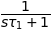

In [13]:
G = 1/(tau1*s + 1)
G

The inverse Laplace transform of a *transfer function* is its *impulse response*

In [14]:
impulseresponse = invL(G)
impulseresponse

If $C_{in}'(t)$ is the unit step function, $C_{in}'(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [15]:
u = 1/s
stepresponse = invL(G*u)
stepresponse

Similarly, the ramp response can be obtained as follows:

In [16]:
u = 1/s**2
rampresponse = invL(G*u)
rampresponse

In [ ]:
from ipywidgets import interact

In [ ]:
evalfimpulse = sympy.lambdify((K, tau, t), impulseresponse, 'numpy')
evalfstep = sympy.lambdify((K, tau, t), stepresponse, 'numpy')
evalframp = sympy.lambdify((K, tau, t), rampresponse, 'numpy')

In [ ]:
ts = numpy.linspace(0, 10)

def firstorder(tau_in, K_in):
    plt.figure(figsize=(12, 6))
    ax_impulse = plt.subplot2grid((2, 2), (0, 0))
    ax_step = plt.subplot2grid((2, 2), (1, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    ax_impulse.plot(ts, evalfimpulse(K_in, tau_in, ts))
    ax_impulse.set_title('Impulse response')
    ax_impulse.set_ylim(0, 10)
    
    tau_height = 1 - numpy.exp(-1)
    ax_step.set_title('Step response')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts))
    ax_step.axhline(K_in)
    ax_step.plot([0, tau_in, tau_in], [K_in*tau_height]*2 + [0], alpha=0.4)
    ax_step.text(0, K_in, '$K=${}'.format(K_in))
    ax_step.text(0, K_in*tau_height, '{:.3}$K$'.format(tau_height))
    ax_step.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    ax_step.set_ylim(0, 10)
    
    ax_complex.set_title('Poles plot')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-10, 10, -10, 10])

In [ ]:
firstorder(1., 10.)

In [ ]:
interact(firstorder, tau_in=(0.1, 10.), K_in=(0.1, 10.));

Exploration of the above interaction allows us to see the following:

* $K$ scales the response in the $y$ direction
* $\tau_1$ scales the response in the $t$ direction
* The response of the system is always $0.63K$ when $t=\tau_1$

We get the "magic number" 0.63 by substituting $t=\tau$ into the response:

In [ ]:
sympy.N((stepresponse.subs(t, tau)/K).simplify())